In [131]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [95]:
csvpath = os.path.join("csv-data", "anxiety-depression-data.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csvpath)

# Filter rows where the "state" column is not equal to "United States"
by_state_df = df[(df['State'] != 'United States') & 
                (df['Group'] == 'By State') & 
                (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
by_state_df['Year'] = by_state_df['date_column'].dt.year

state_mean_df = by_state_df.groupby('State')['Value'].mean()
higher_states = state_mean_df.nlargest(3)
lower_states = state_mean_df.nsmallest(3)

yearly_state_mean_df = by_state_df.groupby(['State', 'Year'])['Value'].mean().reset_index()
state_mean_2020_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2020].set_index('State')
state_mean_2021_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2021].set_index('State')
state_mean_2022_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2022].set_index('State')
state_mean_2023_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2023].set_index('State')
higher_states_2020 = state_mean_2020_df['Value'].nlargest(3)
lower_states_2020 = state_mean_2020_df['Value'].nsmallest(3)
higher_states_2021 = state_mean_2021_df['Value'].nlargest(3)
lower_states_2021 = state_mean_2021_df['Value'].nsmallest(3)
higher_states_2022 = state_mean_2022_df['Value'].nlargest(3)
lower_states_2022 = state_mean_2022_df['Value'].nsmallest(3)
higher_states_2023 = state_mean_2023_df['Value'].nlargest(3)
lower_states_2023 = state_mean_2023_df['Value'].nsmallest(3)

highest_states_tot = pd.DataFrame({'Total Avg': higher_states.index,
                     '2020 Avg': higher_states_2020.index,
                     '2021 Avg': higher_states_2021.index,
                     '2022 Avg': higher_states_2022.index,
                     '2023 Avg': higher_states_2023.index})
lowest_states_tot = pd.DataFrame({'Total Avg': lower_states.index,
                     '2020 Avg': lower_states_2020.index,
                     '2021 Avg': lower_states_2021.index,
                     '2022 Avg': lower_states_2022.index,
                     '2023 Avg': lower_states_2023.index})
print('States with Highest Level of Anxiety and Depression')
print(highest_states_tot)
print(' ')
print('--------------------- ')
print(' ')
print('States with Lowest Level of Anxiety and Depression')
print(lowest_states_tot)

States with Highest Level of Anxiety and Depression
     Total Avg     2020 Avg   2021 Avg     2022 Avg       2023 Avg
0    Louisiana    Louisiana  Louisiana  Mississippi    Mississippi
1  Mississippi       Nevada   Oklahoma    Louisiana      Louisiana
2     Oklahoma  Mississippi   Arkansas     Oklahoma  West Virginia
 
--------------------- 
 
States with Lowest Level of Anxiety and Depression
      Total Avg      2020 Avg      2021 Avg      2022 Avg  \
0  South Dakota  North Dakota  South Dakota     Minnesota   
1     Minnesota  South Dakota     Minnesota  South Dakota   
2  North Dakota     Wisconsin     Wisconsin      Delaware   

               2023 Avg  
0               Vermont  
1             Minnesota  
2  District of Columbia  


/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/232515076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/232515076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state_df['Year'] = by_state_df['date_column'].dt.year


In [209]:
#Import data sets
unin_2019_path =  os.path.join('csv-data', '2019-unisured-pop-data.csv')
unin_2021_path =  os.path.join('csv-data', '2021-unisured-pop-data.csv')
unin_2022_path =  os.path.join('csv-data', '2022-unisured-pop-data.csv')
hpsa_total_path =  os.path.join('csv-data', 'hpsa_total.csv')
med_enr_path =  os.path.join('csv-data', 'medicaid-chip-data.csv')

unin_2019_full_df =  pd.read_csv(unin_2019_path)
unin_2021_full_df =  pd.read_csv(unin_2021_path)
unin_2022_full_df =  pd.read_csv(unin_2022_path)
hpsa_full_df =  pd.read_csv(hpsa_total_path)
med_enr_full_df =  pd.read_csv(med_enr_path)

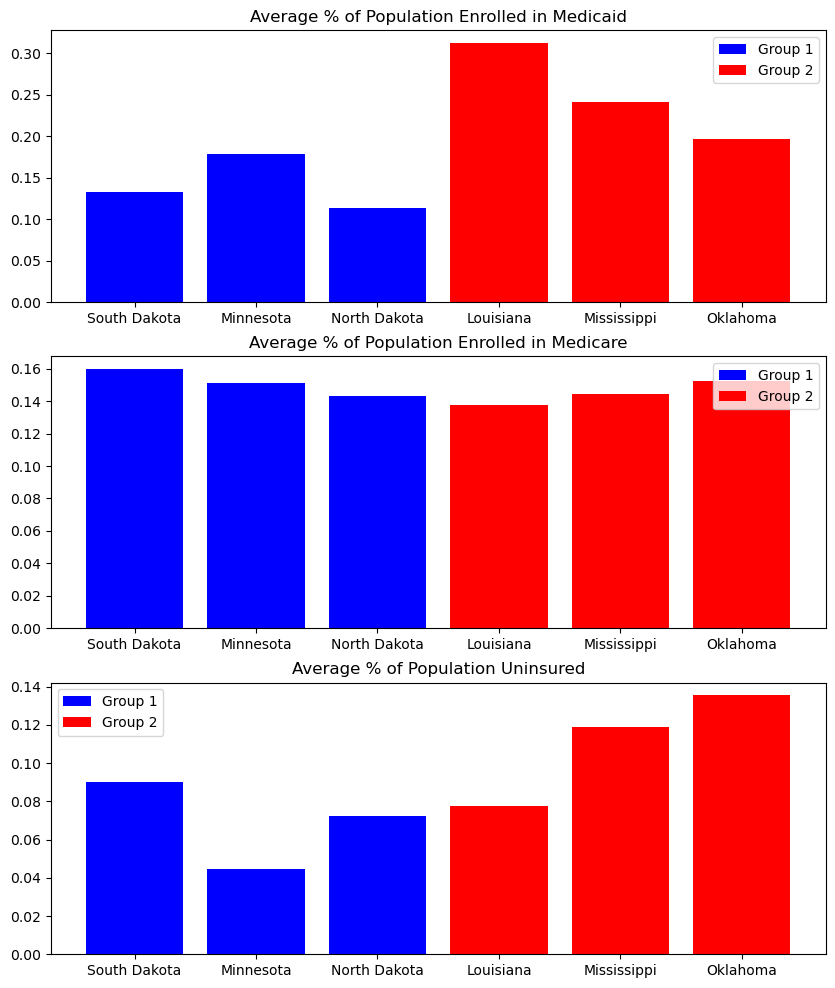

In [202]:
#Uninsured and Insured Data Set
in_clean_df = pd.merge(unin_2019_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured']], 
                        unin_2021_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured']], on = 'Location')
in_clean_df = pd.merge(in_clean_df, unin_2022_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured']], on = 'Location').dropna(how='any')

group1_state_in_clean_df = []
for states in lower_states.index:
    group1_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
group1_state_in_clean_df = pd.concat(group1_state_in_clean_df, ignore_index=True)
group1_state_in_clean_df = group1_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022'})

avg_medicaid_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                       'Uninsured_2021',
 
                                                                           
                                                                           'Uninsured_2022']], axis=1)
group2_state_in_clean_df = []
for states in higher_states.index:
    group2_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
group2_state_in_clean_df = pd.concat(group2_state_in_clean_df, ignore_index=True)
group2_state_in_clean_df = group2_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022'})

avg_medicaid_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                       'Uninsured_2021',
                                                                       'Uninsured_2022']], axis=1)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].bar(avg_medicaid_g1.index, avg_medicaid_g1, color='blue', label='Group 1')
axs[0].bar(avg_medicaid_g2.index, avg_medicaid_g2, color='red', label='Group 2')
axs[0].set_title('Average % of Population Enrolled in Medicaid')
axs[0].legend()

axs[1].bar(avg_medicare_g1.index, avg_medicare_g1, color='blue', label='Group 1')
axs[1].bar(avg_medicare_g2.index, avg_medicare_g2, color='red', label='Group 2')
axs[1].set_title('Average % of Population Enrolled in Medicare')
axs[1].legend()

axs[2].bar(avg_uninsured_g1.index, avg_uninsured_g1, color='blue', label='Group 1')
axs[2].bar(avg_uninsured_g2.index, avg_uninsured_g2, color='red', label='Group 2')
axs[2].set_title('Average % of Population Uninsured')
axs[2].legend()



In [238]:
hpsa_clean_df = hpsa_full_df[['Discipline', 'State', 'HPSA Type (Category)', 'HPSA Score']]

mh_hpsa_clean_df = hpsa_clean_df.loc[hpsa_clean_df['Discipline'] == 'Mental Health'][['State', 'HPSA Type (Category)', 'HPSA Score']]
mh_hpsa_clean_df = mh_hpsa_clean_df.set_index(['State', 'HPSA Type (Category)'])
mh_hpsa_clean_df.groupby(['State', 'HPSA Type (Category)']).mean()

HPSA Score
State     HPSA Type (Category)            
Alabama   Facility               16.463415
          Geographic Area        15.719512
          Population Group       16.869565
Alaska    Facility               14.397351
          Geographic Area        14.120000
...                                    ...
Wisconsin Facility               14.478992
          Geographic Area        12.207612
          Population Group       13.579310
Wyoming   Facility               14.944444
          Geographic Area        13.740741

[161 rows x 1 columns]